# Clase 23

## RNN Simple

In [5]:
import numpy as np
from keras.datasets import mnist
import matplotlib.pyplot as plt
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [4]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

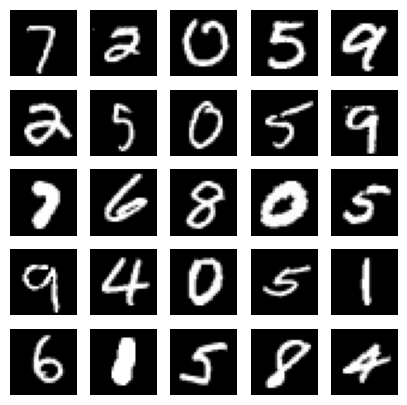

In [10]:
import numpy as np
from keras.datasets import mnist
import matplotlib.pyplot as plt
(x_train, y_train), (x_test, y_test) = mnist.load_data()
indexes = np.random.randint(0, x_train.shape[0], size=25)
images = x_train[indexes]
labels = y_train[indexes]
plt.figure(figsize=(5,5))
for i in range(len(indexes)):
    plt.subplot(5, 5, i + 1)
    image = images[i]
    plt.imshow(image, cmap='gray')
    plt.axis('off')
plt.show()
#plt.savefig("mnist-samples.png")
plt.close('all')

In [11]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, SimpleRNN
from tensorflow.keras.utils import to_categorical
num_labels = len(np.unique(y_train))
print(num_labels)
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
image_size = x_train.shape[1]
x_train = np.reshape(x_train,[-1, image_size, image_size])
x_test = np.reshape(x_test,[-1, image_size, image_size])
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255
y_train

10


array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [13]:
len(y_train[0])

10

In [8]:
# network parameters
input_shape = (image_size, image_size)
batch_size = 128
units = 256
dropout = 0.2
lr = 0.001

In [9]:
model = Sequential()
model.add(SimpleRNN(units=units, dropout=dropout, input_shape=input_shape))
model.add(Dense(num_labels))
model.add(Activation('softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 256)               72960     
                                                                 
 dense (Dense)               (None, 10)                2570      
                                                                 
 activation (Activation)     (None, 10)                0         
                                                                 
Total params: 75,530
Trainable params: 75,530
Non-trainable params: 0
_________________________________________________________________


In [10]:
from tensorflow.keras import optimizers
optimizer = optimizers.Adam(lr=lr, decay=6e-6)
model.compile(loss='categorical_crossentropy', optimizer=optimizer,metrics=['accuracy'])
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=2,validation_data=(x_test, y_test))
loss, acc = model.evaluate(x_test, y_test, batch_size=batch_size)
print("\nTest accuracy: %.1f%%" % (100.0 * acc))

c:\Users\acer\anaconda3\envs\analisis_datos\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/2
208/469 [============>.................] - ETA: 18s - loss: 0.5275 - accuracy: 0.8368

KeyboardInterrupt: 

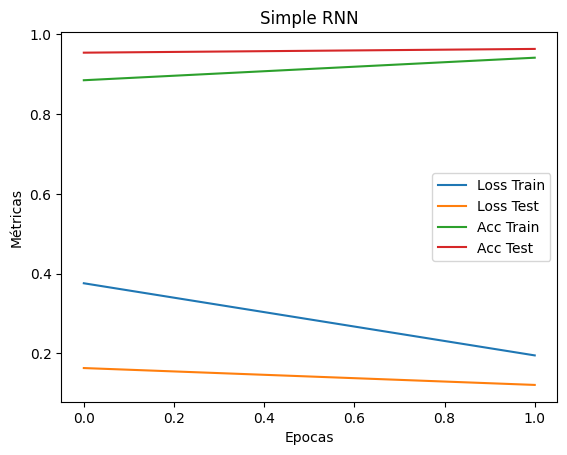

In [6]:
import matplotlib.pyplot as plt
plt.plot(history.history["loss"], label="Loss Train")
plt.plot(history.history["val_loss"], label="Loss Test")
plt.plot(history.history["accuracy"], label="Acc Train")
plt.plot(history.history["val_accuracy"], label="Acc Test")
plt.title('Simple RNN')
plt.ylabel('Métricas')
plt.xlabel('Epocas')
plt.legend(loc='best')
plt.savefig("rend_rnn.jpg", bbox_inches='tight', dpi=300)
plt.show()

## LSTM

In [5]:
from tensorflow.keras.layers import LSTM
input_shape = (image_size, image_size)
batch_size = 128
units = 256
dropout = 0.2
epochs = 10
lr = 0.001
optimizer = optimizers.Adam(lr=lr, decay=6e-6)


NameError: name 'optimizers' is not defined

In [8]:
model = Sequential()
model.add(LSTM(units=units, dropout=dropout, input_shape=input_shape))
model.add(Dense(num_labels))
model.add(Activation('softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 256)               291840    
                                                                 
 dense_1 (Dense)             (None, 10)                2570      
                                                                 
 activation_1 (Activation)   (None, 10)                0         
                                                                 
Total params: 294,410
Trainable params: 294,410
Non-trainable params: 0
_________________________________________________________________


In [9]:
model.compile(loss='categorical_crossentropy', optimizer=optimizer,metrics=['accuracy'])
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs,validation_data=(x_test, y_test))
loss, acc = model.evaluate(x_test, y_test, batch_size=batch_size)
print("\nTest accuracy: %.1f%%" % (100.0 * acc))

Epoch 1/10


: 

: 